In [28]:
import ast

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [29]:
df = pd.read_csv("dual_solver.csv", sep="\t")
df["iterations"] = df.iterations.apply(lambda x: ast.literal_eval(str(x)))
df["solver_time"] = df.solver_time.apply(lambda x: ast.literal_eval(str(x)))
df

,i,k,t,iterations,solver_time
0,1,0,5,"[721, 789, 860]","[7.6452796459198, 7.0511040687561035, 8.247689..."
1,1,0,4,"[755, 608, 738]","[7.718892574310303, 6.326546907424927, 6.31188..."
2,1,0,3,"[590, 590, 584]","[6.4589104652404785, 6.538985967636108, 6.4768..."
3,1,0,2,"[1273, 4485, 3793]","[10.589385986328125, 52.26857852935791, 42.110..."
4,1,0,1,"[1463, 1455, 1467]","[11.272828340530396, 11.471176862716675, 11.72..."
5,2,0,5,"[664, 666, 682]","[6.299757242202759, 6.323287725448608, 6.40288..."
6,2,0,4,"[5000, 803, 5000]","[66.12373328208923, 8.1680166721344, 62.242749..."
7,2,0,3,"[1049, 826, 519]","[11.730751276016235, 7.163283109664917, 4.9158..."
8,2,0,2,"[873, 4912, 895]","[5.720903158187866, 45.59390902519226, 5.80021..."
9,2,0,1,"[5000, 1416, 1355]","[20.764297485351562, 9.907533168792725, 10.526..."


In [30]:
n_iterations = df["i"].nunique()
n_samples = df["k"].nunique()
n_stages = df["t"].nunique()
n_realizations = len(df.iterations.iloc[0])

Iterations: 5
Samples: 1
Stages: 5
Realizations: 3


In [31]:
df

,i,k,t,iterations,solver_time
0,1,0,5,"[721, 789, 860]","[7.6452796459198, 7.0511040687561035, 8.247689..."
1,1,0,4,"[755, 608, 738]","[7.718892574310303, 6.326546907424927, 6.31188..."
2,1,0,3,"[590, 590, 584]","[6.4589104652404785, 6.538985967636108, 6.4768..."
3,1,0,2,"[1273, 4485, 3793]","[10.589385986328125, 52.26857852935791, 42.110..."
4,1,0,1,"[1463, 1455, 1467]","[11.272828340530396, 11.471176862716675, 11.72..."
5,2,0,5,"[664, 666, 682]","[6.299757242202759, 6.323287725448608, 6.40288..."
6,2,0,4,"[5000, 803, 5000]","[66.12373328208923, 8.1680166721344, 62.242749..."
7,2,0,3,"[1049, 826, 519]","[11.730751276016235, 7.163283109664917, 4.9158..."
8,2,0,2,"[873, 4912, 895]","[5.720903158187866, 45.59390902519226, 5.80021..."
9,2,0,1,"[5000, 1416, 1355]","[20.764297485351562, 9.907533168792725, 10.526..."


In [32]:
solver_times = np.array(df.solver_time.values.tolist())
solver_iterations = np.array(df.iterations.tolist())

In [33]:
dual_evaluation_times = np.divide(solver_times, solver_iterations)
dual_evaluation_times

array([[0.01060372, 0.00893676, 0.00959034],
       [0.0102237 , 0.0104055 , 0.00855269],
       [0.01094731, 0.01108303, 0.01109051],
       [0.00831845, 0.01165409, 0.01110224],
       [0.00770528, 0.00788397, 0.00799334],
       [0.00948759, 0.00949443, 0.0093884 ],
       [0.01322475, 0.01017188, 0.01244855],
       [0.01118279, 0.00867226, 0.00947172],
       [0.00655315, 0.00928215, 0.00648069],
       [0.00415286, 0.00699685, 0.00776861],
       [0.00989003, 0.00957158, 0.00894976],
       [0.01450066, 0.0140503 , 0.01408883],
       [0.0067937 , 0.00624872, 0.00668829],
       [0.01126607, 0.01146853, 0.01281002],
       [0.01031617, 0.01181783, 0.01252382],
       [0.00943537, 0.00894761, 0.00861839],
       [0.01524951, 0.01793211, 0.01537558],
       [0.00918724, 0.01000098, 0.00962332],
       [0.00999274, 0.00993256, 0.0089852 ],
       [0.00931961, 0.0108968 , 0.0117906 ],
       [0.00997853, 0.00891407, 0.00893522],
       [0.01824798, 0.01709694, 0.0166908 ],
       [0.

In [34]:
avg_evaluation_times = np.mean(dual_evaluation_times, axis=1).tolist()
avg_evaluation_times

[0.009710271333431999,
 0.009727298882972997,
 0.011040282374463134,
 0.010358258012089826,
 0.007860863130758173,
 0.009456804644471918,
 0.011948390966215883,
 0.009775591550424475,
 0.007438663610885289,
 0.006306104764759352,
 0.00947045370119747,
 0.014213264921409155,
 0.006576905586130084,
 0.011848205256136675,
 0.011552608388432284,
 0.009000456004366995,
 0.01618573128076563,
 0.00960384964323932,
 0.009636832974720788,
 0.010669004738769507,
 0.00927593978246053,
 0.017345242677010663,
 0.0104763257630899,
 0.01001814358715471,
 0.007549937365666784]

In [35]:
eval_times_per_iteration = []
i = 0
while i < n_iterations * n_stages:
    eval_times_per_iteration.append(avg_evaluation_times[i : i + n_stages])
    i += n_stages


iterations = [i + 1 for i in range(n_iterations)]

eval_times_per_iteration = np.array(eval_times_per_iteration)

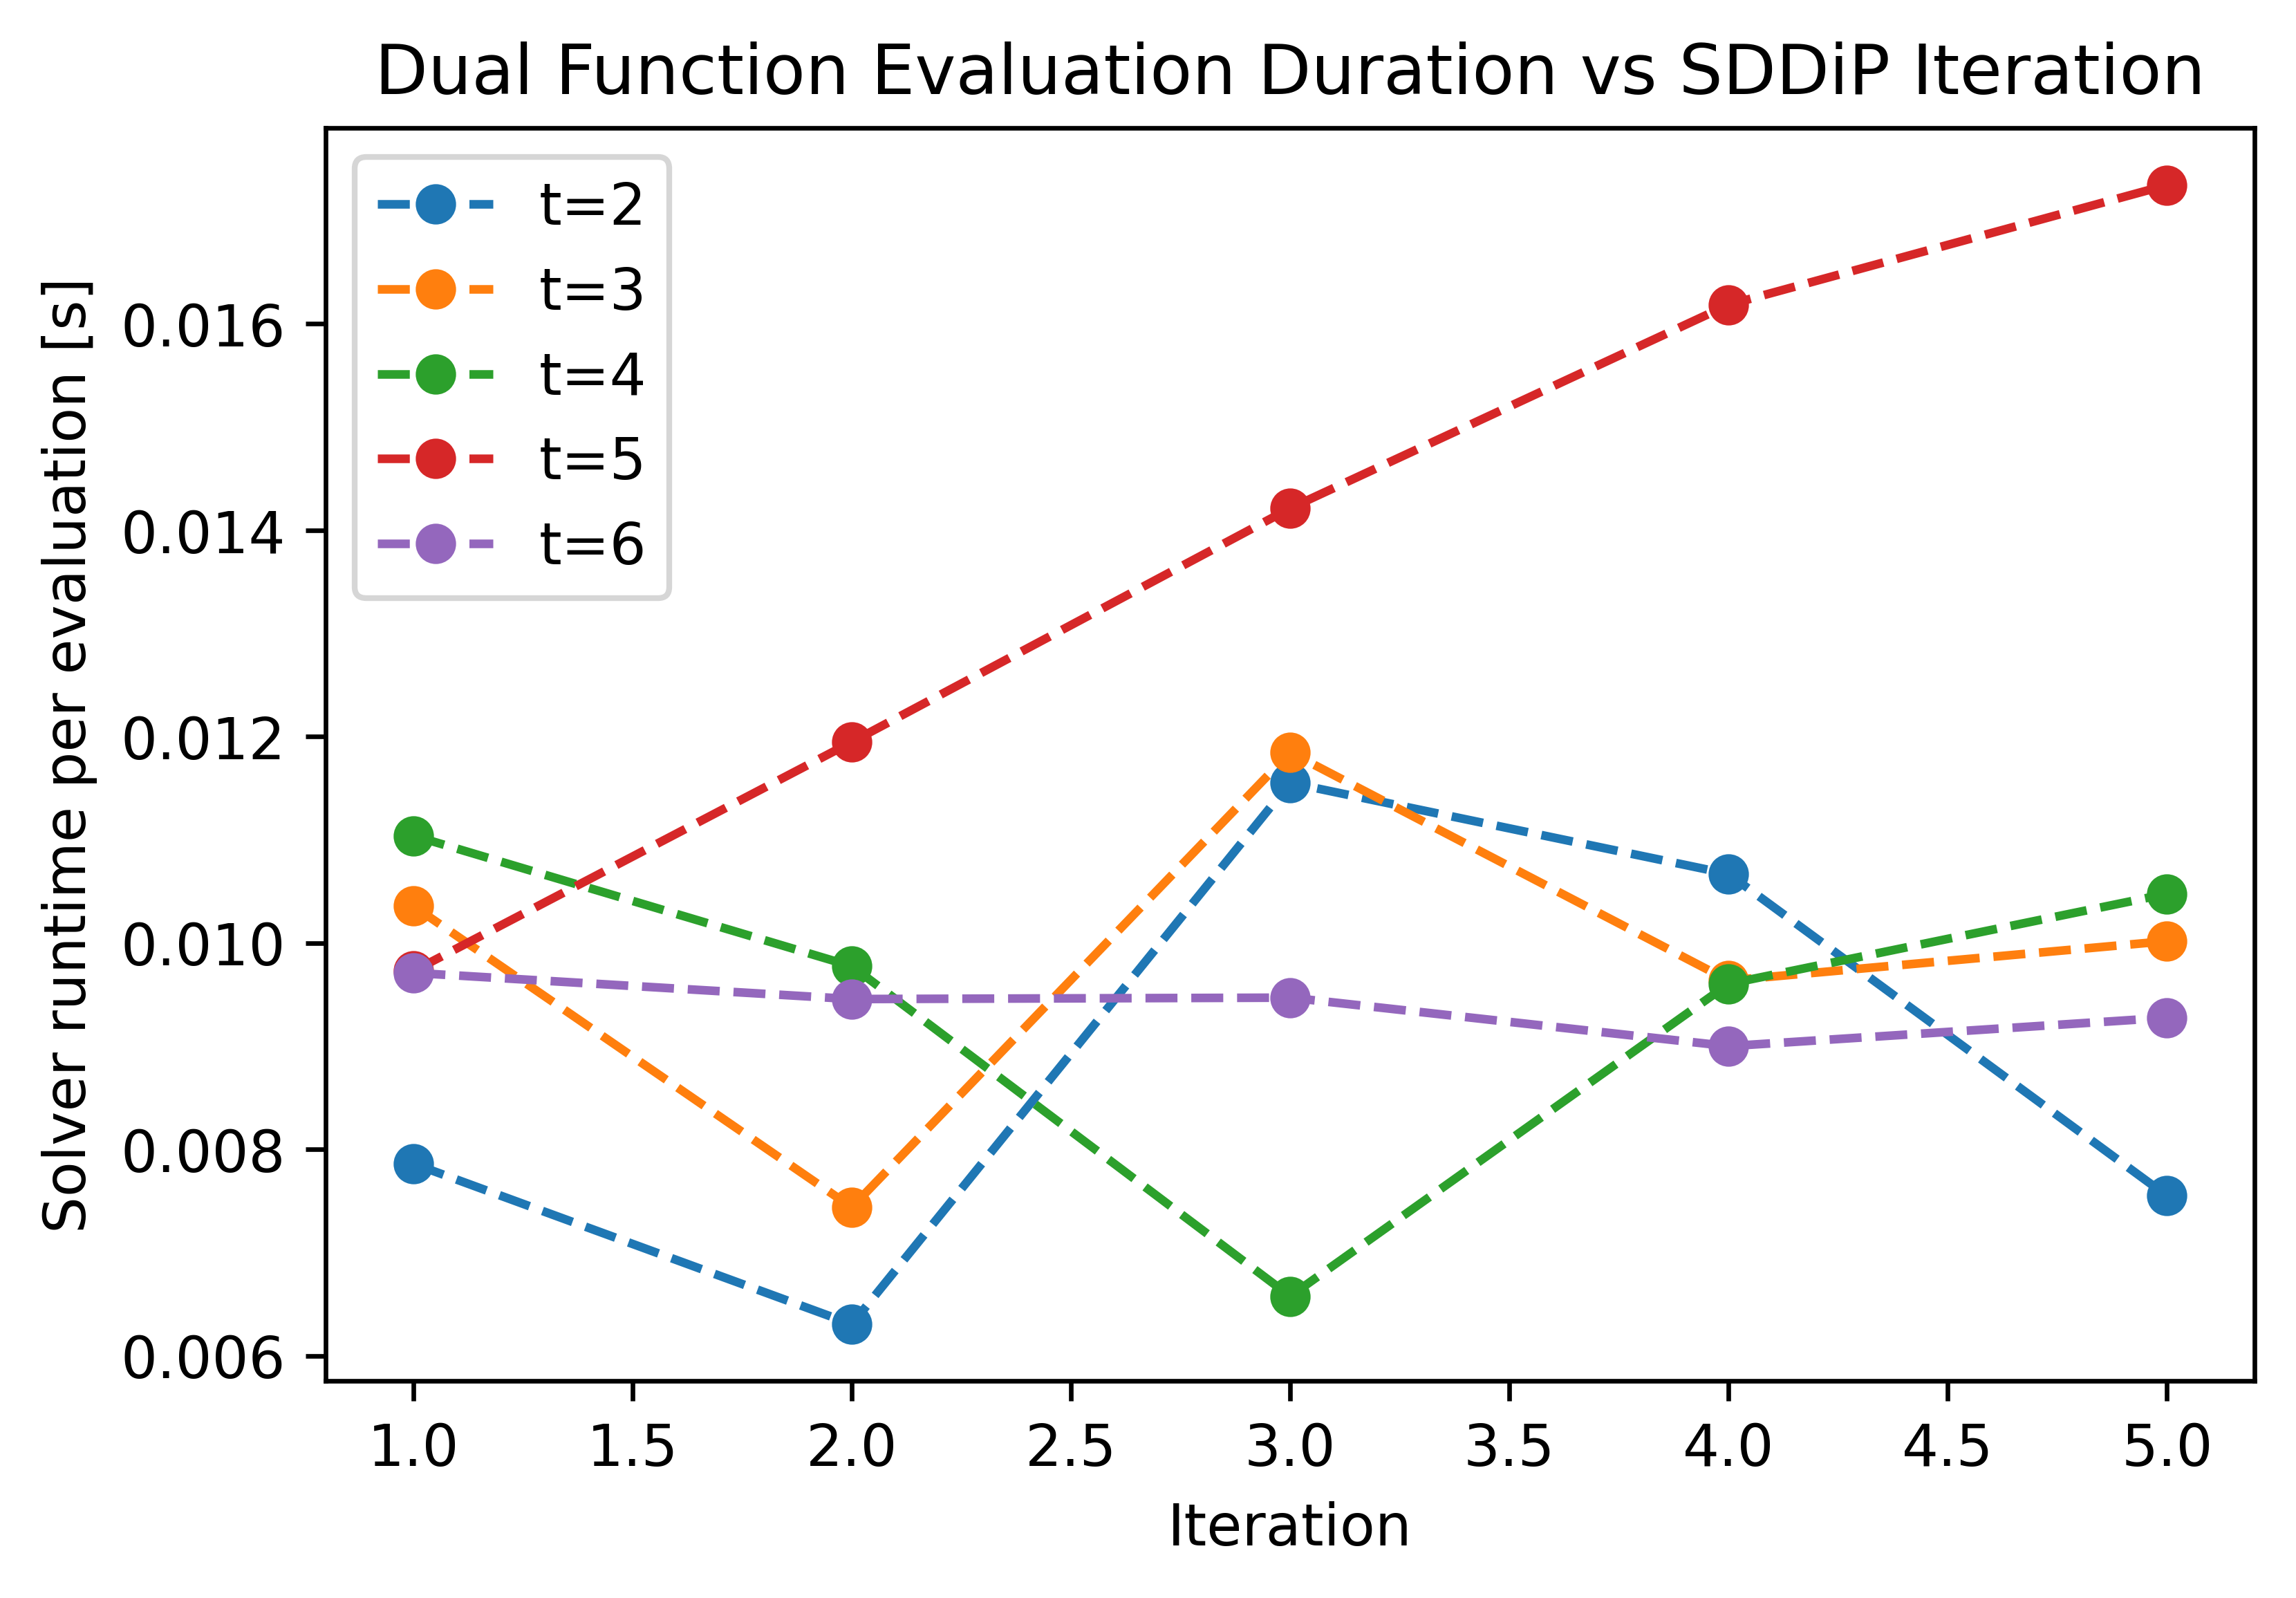

In [36]:
plt.figure(dpi=600, facecolor="w", edgecolor="k")

for t in range(n_stages):
    plt.plot(
        iterations,
        eval_times_per_iteration[:, n_stages - (t + 1)],
        "--o",
        label=f"t={t+2}",
    )

plt.gca().set(xlabel="Iteration", ylabel="Solver runtime per evaluation [s]")
plt.title("Dual Function Evaluation Duration vs SDDiP Iteration")
# plt.ylim([0, 1])
plt.legend()
plt.show()